In [109]:
import sqlite3  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
connection = sqlite3.connect("../data/parts_avatar.db")

cursor = connection.cursor()

## Average cost price per product category

In [101]:
d_1 = pd.read_sql("SELECT product_metadata.category as category, avg(supplier_feed.cost_price) as average_price FROM supplier_feed left join product_metadata on supplier_feed.part_id = product_metadata.part_id group by product_metadata.category;", connection)
d_1

,category,average_price
0,Brakes,230.012663
1,Electronics,226.857328
2,Engine,228.924692
3,Exhaust,224.415684
4,Filters,229.784954
5,HVAC,226.803691
6,Suspension,233.004593


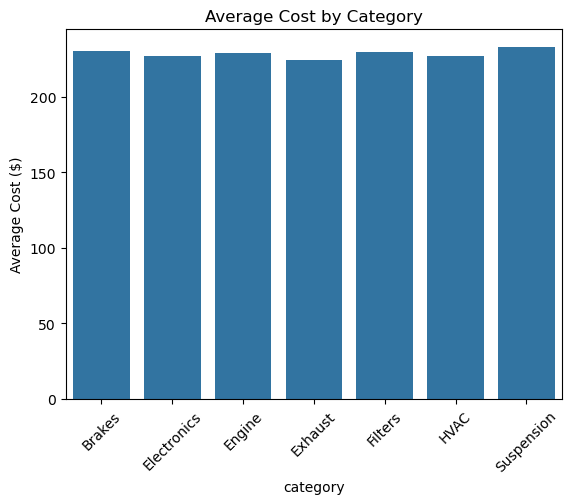

In [102]:
sns.barplot(x="category", y="average_price", data=d_1)
plt.xticks(rotation=45)
plt.title("Average Cost by Category")
plt.ylabel("Average Cost ($)")
plt.show()


## Top 5 parts with the highest stock levels

In [103]:
df_2 = pd.read_sql("SELECT product_metadata.part_id, product_metadata.part_name, product_metadata.category, supplier_feed.cost_price, supplier_feed.stock_level FROM supplier_feed left join product_metadata on supplier_feed.part_id = product_metadata.part_id order by supplier_feed.stock_level desc limit 5;", connection)
df_2

,part_id,part_name,category,cost_price,stock_level
0,SP-450,Exhaut Filter,Exhaust,341.37,500
1,SP-475,Engine Rotor,Engine,382.91,500
2,SP-225,Exhaut Filter,Exhaust,53.00,500
3,SP-427,HVAC Pump,HVAC,168.10,500
4,SP-333,Supenion Gasket,Suspension,445.55,500


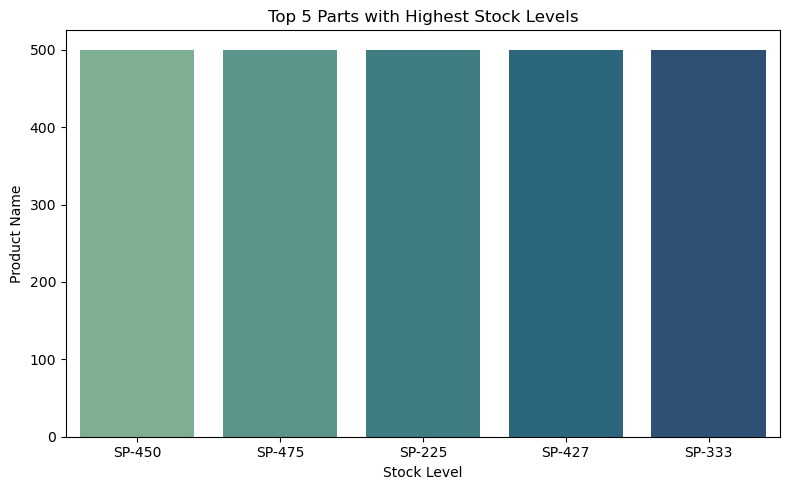

In [104]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_2,
    x="part_id",
    y="stock_level",
    hue="part_id",
    dodge=False,
    palette="crest"
)
plt.title("Top 5 Parts with Highest Stock Levels")
plt.xlabel("Stock Level")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


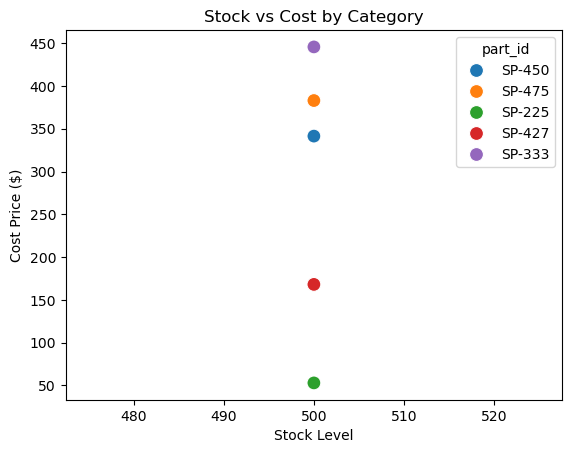

In [48]:
sns.scatterplot(data=df_2, x="stock_level", y="cost_price", hue="part_id", s=100)
plt.title("Stock vs Cost by Category")
plt.xlabel("Stock Level")
plt.ylabel("Cost Price ($)")
plt.show()


## Number of new parts entries from supplier changed over time (on a monthly basis)

In [98]:
df_3 = pd.read_sql("SELECT count(product_metadata.part_id) as new_entries, strftime('%Y-%m', entry_date) AS month, product_metadata.category " \
                   "FROM supplier_feed left join product_metadata on supplier_feed.part_id = product_metadata.part_id " \
                   "group by month, product_metadata.category order by month asc;", connection)
df_3

,new_entries,month,category
0,255,2024-01,Brakes
1,248,2024-01,Electronics
2,154,2024-01,Engine
3,214,2024-01,Exhaust
4,214,2024-01,Filters
...,...,...,...
128,187,2025-07,Engine
129,222,2025-07,Exhaust
130,247,2025-07,Filters
131,216,2025-07,HVAC


/var/folders/dw/1bwqcz8s4rzbqvv2z9bd0vt40000gn/T/ipykernel_11619/1375826032.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_3, x="month", y="new_entries", marker="o", ci=None)


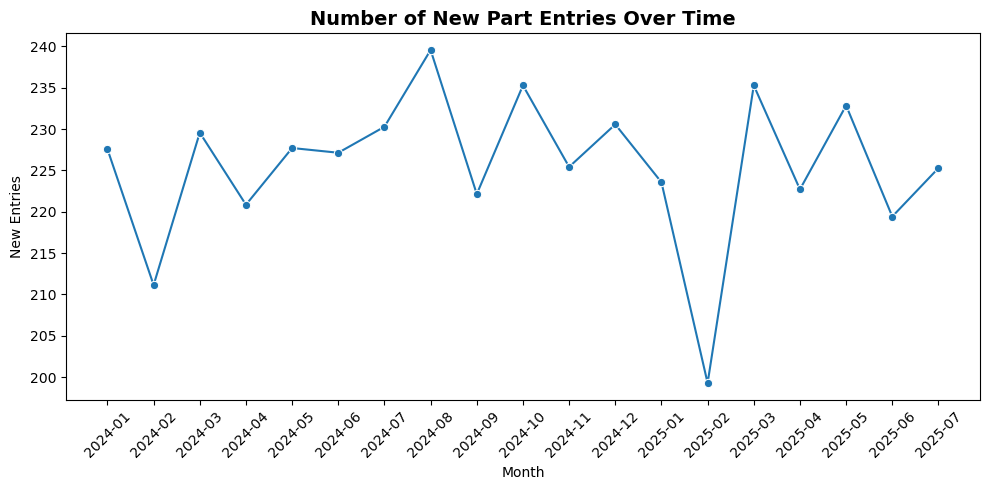

In [108]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_3, x="month", y="new_entries", marker="o", ci=None)
plt.title("Number of New Part Entries Over Time", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("New Entries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


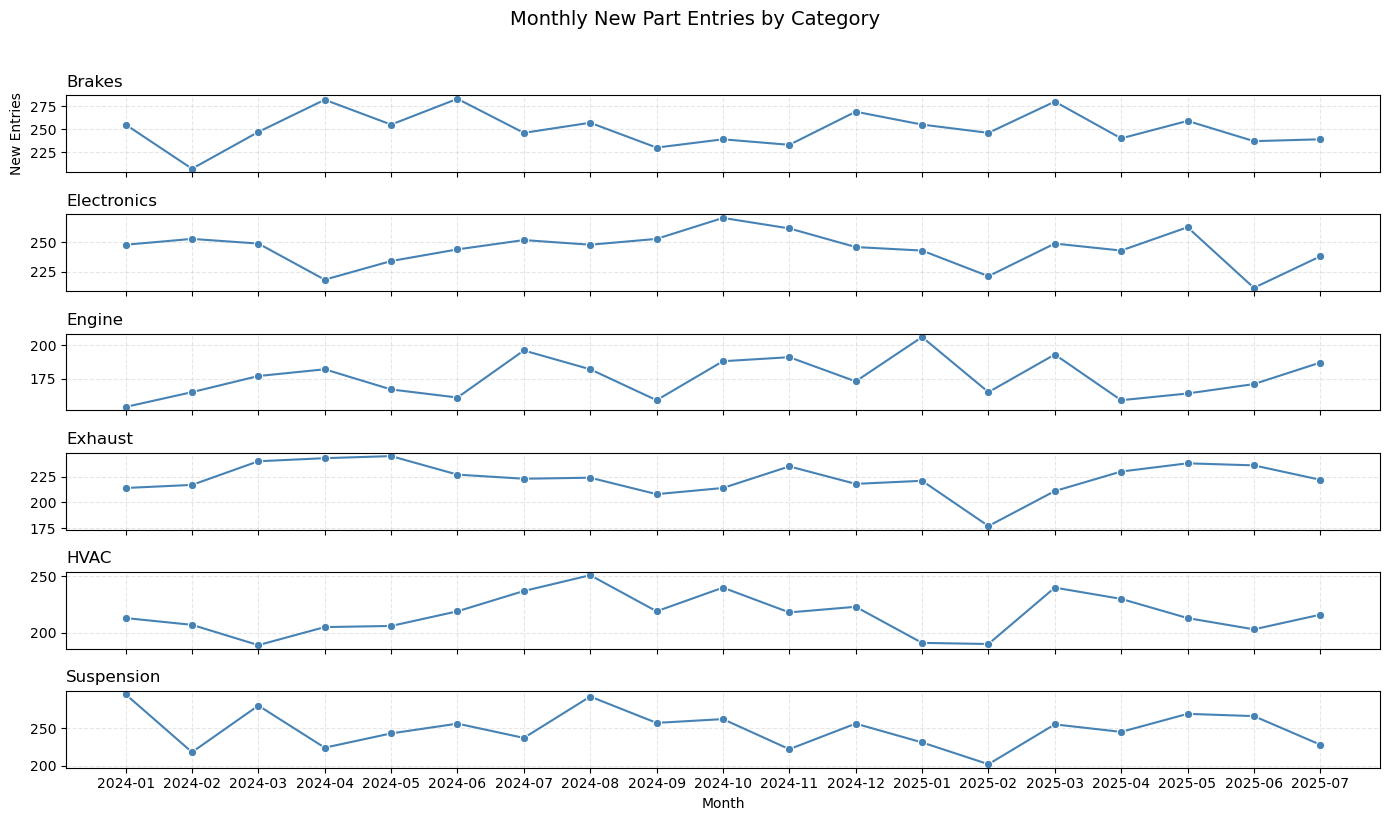

In [106]:
categories = ["Brakes", "Electronics", "Engine", "Exhaust", "HVAC", "Suspension"]

fig, ax = plt.subplots(len(categories), 1, figsize=(14, 8), sharex=True)

for i, cat in enumerate(categories):
    subset = df_3[df_3['category'] == cat]
    sns.lineplot(data=subset, x="month", y="new_entries", marker="o", ax=ax[i], color="steelblue")
    ax[i].set_title(f"{cat}", fontsize=12, loc="left")
    ax[i].set_ylabel("New Entries" if i == 0 else "")
    ax[i].grid(True, linestyle="--", alpha=0.3)

plt.xlabel("Month")
plt.suptitle("Monthly New Part Entries by Category", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
connection.close()